In [7]:
from pathlib import Path

import numpy as np
import pandas as pd
import virtually.auxfuncs as aux

# Change to your data directory
basedir = Path('/Volumes/data-1/behavior/hakan')


## Figures S2F and S2G

### Load data


In [8]:
data_path = basedir/'Kucukdereli_atal_data/data_table_all_mice.h5'

data_df = pd.read_hdf(data_path, key='data')


In [9]:
# Additional imports and setting up the plots
from scipy.stats import pearsonr, linregress, ttest_rel
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt

font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('axes', linewidth=0.8)

colors = {'gray':'#D4D4D4', 'darkgray':'#545454', 
          'male':'#FF5E74', 'male_light':'#FFABB6', 
          'female':'#00B7FF', 'female_light':'#9EE3FF'}


### Correlation plots for AgRP stim triggered food consumtion and daily AgRP stim preference

[False False  True False  True] [0.11926755 0.49096909 0.00798894 0.1019431  0.01827299]
[False False False False False] [1.         1.         1.         0.97338576 1.        ]


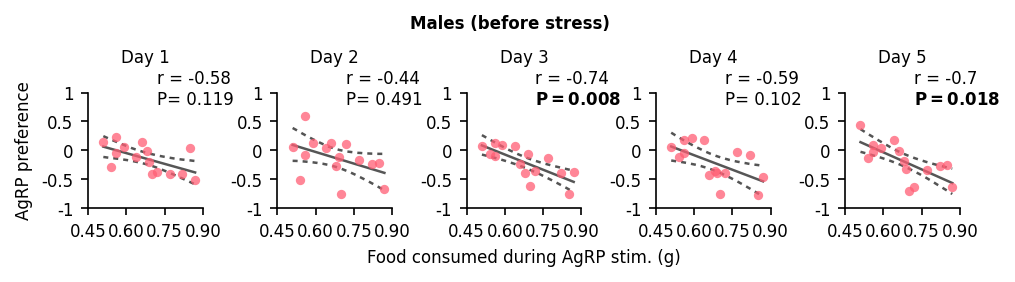

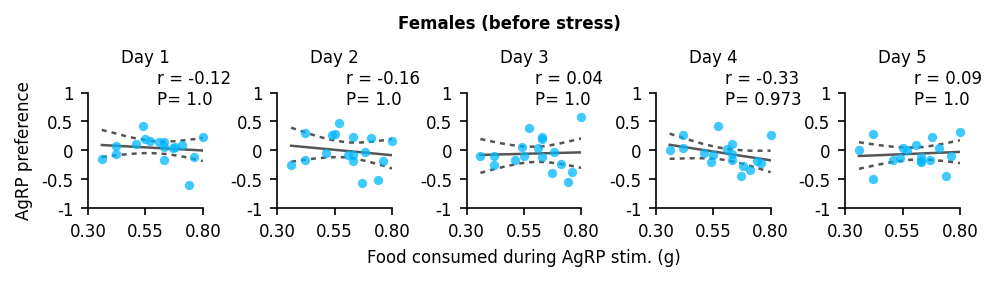

In [10]:
for s, sex in enumerate(['male', 'female']):
    fig, axs = plt.subplots(1,5,figsize=(5*1.5,1.), dpi=150)
    fig.subplots_adjust(wspace=0.65)
    fig.suptitle(f'{sex[0].upper()}{sex[1:]}s (before stress)', y=1.4, fontsize=8, fontweight='bold')
    
    axs[2].set_xlabel('Food consumed during AgRP stim. (g)')
    axs[0].set_ylabel('AgRP preference')
    
    pvals, rvals = [], []
    for d, day in enumerate([1,2,3,4,5]):
        df = data_df.query("@data_df.mouse.sex==@sex")
        
        X = df.loc[:, ('feeding', 'amount')].to_numpy()
        y = df.loc[:, ('test', day)].to_numpy()

        # Linear regression
        result = linregress(X, y)
        y_new = result.slope * np.array(X) + result.intercept

        # Calculate Pearson's correlation coefficient
        r, p = pearsonr(X, y)
        pvals.append(p)
        rvals.append(r)

        # Bootstrapping for the confidence interval
        resid = y_new - y # Calculate residuals
        y_boot = []
        for _ in range(10000):
            bootindex = np.random.randint
            result = linregress(X, y + resid[bootindex(0, len(resid) - 1, len(resid))])
            x_ = np.linspace(np.min(X),np.max(X))
            y_boot.append(result.slope*np.array(x_) + result.intercept)
        y_boot = np.array(y_boot)

        # Get the 95% confidence interval
        l_x = x_[np.argsort(x_)]
        l_upper = np.quantile(y_boot,0.975, axis=0)[np.argsort(x_)]
        l_lower = np.quantile(y_boot,0.025, axis=0)[np.argsort(x_)]
        
        # Plot the data
        ax = axs[d]

        ax.plot(l_x, l_upper, color=colors['darkgray'], linewidth=1.2, linestyle=(0,(2,2)), zorder=-1)
        ax.plot(l_x, l_lower, color=colors['darkgray'], linewidth=1.2, linestyle=(0,(2,2)), zorder=-1)
        ax.plot(X[np.argsort(X)], y_new[np.argsort(X)], color='#565656', linewidth=1.2, zorder=-1)

        ax.scatter(X, y, s=20, color=colors[sex], linewidth=0, alpha=0.75, clip_on=False, zorder=1)

        if sex=='male':
            ax.set_xlim([0.45,0.9])
            ax.set_xticks(np.linspace(0.45, 0.9, 4))
        else:
            ax.set_xlim([0.3,0.8])
            ax.set_xticks(np.linspace(0.3,0.8,3))

        ax.set_ylim([-1,1])

        ax.set_yticks([-1,-0.5,0,0.5,1])
        ax.set_yticklabels([-1,-0.5,0,0.5,1])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.set_title(f"Day {day}", y=1.15, fontsize=8)

    # Correct for multiple comparisons
    alpha = 0.05
    t, pcorrected, _, _ = multipletests(pvals, alpha=alpha, method='bonferroni')
    print(t, pcorrected)
    for i, p in enumerate(pcorrected):
        r = rvals[i]
        if p < alpha:
            txt = f'r = {np.round(r,2)}\n'+fr'$\bf{{P= {np.round(p,3)}}}$'
        else:
            txt = f'r = {np.round(r,2)}\n'+f'P= {np.round(p,3)}'
        axs[i].annotate(txt, xy=(0.6, 0.9), xycoords='axes fraction', fontsize=8)


[False False False False False] [1.         1.         0.9155836  0.32321841 0.62786554]
[False False False False False] [1. 1. 1. 1. 1.]


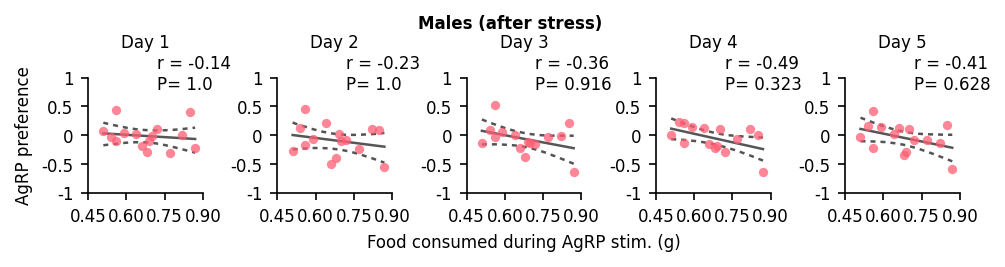

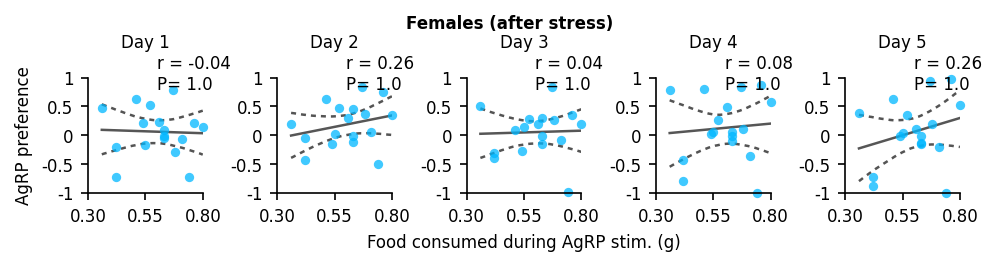

In [11]:
for s, sex in enumerate(['male', 'female']):
    fig, axs = plt.subplots(1,5,figsize=(5*1.5,1.), dpi=150)
    fig.subplots_adjust(wspace=0.65)
    fig.suptitle(f"{sex[0].upper()}{sex[1:]}s (after stress)", y=1.3, fontsize=8, fontweight='bold')
    
    axs[2].set_xlabel('Food consumed during AgRP stim. (g)')
    axs[0].set_ylabel('AgRP preference')
    
    pvals, rvals = [], []
    for d, day in enumerate([1,2,3,4,5]):
        df = data_df.query("@data_df.mouse.sex==@sex")
        
        X = df.loc[:, ('feeding', 'amount')].to_numpy()
        y = df.loc[:, ('test_', day)].to_numpy()

        # Linear regression
        result = linregress(X, y)
        y_new = result.slope * np.array(X) + result.intercept

        # Calculate Pearson's correlation coefficient
        r, p = pearsonr(X, y)
        pvals.append(p)
        rvals.append(r)

        # Bootstrapping for the confidence interval
        resid = y_new - y # Calculate residuals
        y_boot = []
        for _ in range(10000):
            bootindex = np.random.randint
            result = linregress(X, y + resid[bootindex(0, len(resid) - 1, len(resid))])
            x_ = np.linspace(np.min(X),np.max(X))
            y_boot.append(result.slope*np.array(x_) + result.intercept)
        y_boot = np.array(y_boot)

        # Get the 95% confidence interval
        l_x = x_[np.argsort(x_)]
        l_upper = np.quantile(y_boot,0.975, axis=0)[np.argsort(x_)]
        l_lower = np.quantile(y_boot,0.025, axis=0)[np.argsort(x_)]
        
        # Plot the data
        ax = axs[d]

        ax.plot(l_x, l_upper, color=colors['darkgray'], linewidth=1.2, linestyle=(0,(2,2)), zorder=-1)
        ax.plot(l_x, l_lower, color=colors['darkgray'], linewidth=1.2, linestyle=(0,(2,2)), zorder=-1)
        ax.plot(X[np.argsort(X)], y_new[np.argsort(X)], color='#565656', linewidth=1.2, zorder=-1)

        ax.scatter(X, y, s=20, color=colors[sex], linewidth=0, alpha=0.75, clip_on=False, zorder=1)

        if sex=='male':
            ax.set_xlim([0.45,0.9])
            ax.set_xticks(np.linspace(0.45, 0.9, 4))
        else:
            ax.set_xlim([0.3,0.8])
            ax.set_xticks(np.linspace(0.3,0.8,3))

        ax.set_ylim([-1,1])

        ax.set_yticks([-1,-0.5,0,0.5,1])
#         ax.set_xticklabels([0,0.1,0.2,0.3])
        ax.set_yticklabels([-1,-0.5,0,0.5,1])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.set_title(f"Day {day}", y=1.15, fontsize=8)

    # Correct for multiple comparisons
    alpha = 0.05
    t, pcorrected, _, _ = multipletests(pvals, alpha=alpha, method='bonferroni')
    print(t, pcorrected)
    for i, p in enumerate(pcorrected):
        r = rvals[i]
        if p < alpha:
            txt = f'r = {np.round(r,2)}\n'+fr'$\bf{{P= {np.round(p,3)}}}$'
        else:
            txt = f'r = {np.round(r,2)}\n'+f'P= {np.round(p,3)}'
        axs[i].annotate(txt, xy=(0.6, 0.9), xycoords='axes fraction', fontsize=8)


## Figure S2H

### AgRP stim-triggered food intake in the begining and at the end of the experimental timeline
For details of the experimental timeline see Figure 1A. For the details stim-triggered food intake assay see *Evaluation of the fiber placement* under Methods. 

Males P = 0.17621553, n = 15
Females P = 0.02302248, n = 17


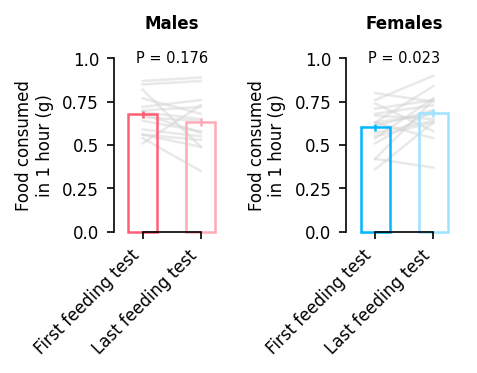

In [12]:
fig, axs = plt.subplots(1,2,figsize=(2*1.5,1.5), dpi=150)
fig.subplots_adjust(wspace=1)

for i, sex in enumerate(['male','female']):
    df = data_df.query('@data_df.mouse.sex==@sex')['feeding'][['amount','amount_']]

    ax = axs[i]

    ax.set_title(f"{sex[0].upper()}{sex[1:]}s", y=1.1, fontsize=8, fontweight='bold')

    df.transpose().plot(ax=ax, kind='line', linewidth=1.2, color=colors['gray'], alpha=0.5, legend=False, zorder=-1)
    df.mean(axis=0).plot.bar(ax=ax, yerr=data_df['feeding'][['amount','amount_']].sem(axis=0), 
                            clip_on=False, zorder=1, fill=False, edgecolor=[colors[f'{sex}'],colors[f'{sex}_light']], linewidth=1.2,
                            error_kw={'capsize':0, 'elinewidth':1.2, 'ecolor':[colors[f'{sex}'],colors[f'{sex}_light']]})


    ax.set_ylim([0,1.0])
    ax.set_yticks(np.arange(0,1.01,0.25))
    ax.set_yticklabels(np.arange(0,1.01,0.25))

    ax.set_xticklabels(['First feeding test', 'Last feeding test'], y=0, ha='right', rotation=45)

    ax.set_xlabel('')
    ax.set_ylabel('Food consumed\nin 1 hour (g)')

    ax.spines[['top','right']].set_visible(False)
    ax.spines['bottom'].set_bounds(0,1)

    # Run stats
    t, p = ttest_rel(df['amount'], df['amount_'])
    ax.text(x=0.5, y=1.0, s=f'P = {p:.3f}', ha='center', va='center', fontsize=7)

    print(f'{sex[0].upper()}{sex[1:]}s P = {p:.8f}, n = {len(df)}')
